In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import keras
import time

load dữ liệu Mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]

Reshape lại dữ liệu theo đúng fomat của keras

In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


one hot encoding

In [4]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)

model

In [5]:
model = Sequential()
model.add(Conv2D(6, (5,5), activation = "relu", padding='same', input_shape=(28,28,1)))
#AveragePooling2D
#MaxPooling2D
model.add(MaxPooling2D(pool_size=(2,2), strides= 2))
model.add(Conv2D(16, (5,5), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides= 2))

model.add(Flatten())
model.add(Dense(120, activation="relu"))
model.add(Dense(84, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

Hàm lossfunction, Trainning model

In [6]:
adam = keras.optimizers.Adam(lr=0.001)

In [7]:
model.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])
t1 = time.time()
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=10, verbose=1)
t = time.time() - t1

Epoch 1/10
782/782 [==============================] - 12s 14ms/step - loss: 2.1050 - accuracy: 0.7964 - val_loss: 0.1491 - val_accuracy: 0.9570
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 0.1087 - accuracy: 0.9664 - val_loss: 0.0967 - val_accuracy: 0.9717
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 0.0676 - accuracy: 0.9790 - val_loss: 0.0865 - val_accuracy: 0.9755
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 0.0518 - accuracy: 0.9835 - val_loss: 0.0754 - val_accuracy: 0.9794
Epoch 5/10
782/782 [==============================] - 11s 13ms/step - loss: 0.0443 - accuracy: 0.9864 - val_loss: 0.0765 - val_accuracy: 0.9814
Epoch 6/10
782/782 [==============================] - 11s 14ms/step - loss: 0.0370 - accuracy: 0.9875 - val_loss: 0.0743 - val_accuracy: 0.9799
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.0324 - accuracy: 0.9893 - val_loss: 0.0730 - val_accuracy:

Đánh giá model với dữ liệu test

In [8]:
score = model.evaluate(X_test, Y_test, verbose=2)
print(score)

313/313 - 1s - loss: 0.0736 - accuracy: 0.9816
[0.07363264262676239, 0.9815999865531921]


[6.6695144e-10 3.2408989e-09 9.9999964e-01 1.8754405e-10 2.4682126e-10
 4.3203220e-13 8.6643034e-08 1.8506194e-07 2.7458261e-11 6.4999776e-12]
Giá trị dự đoán:  2


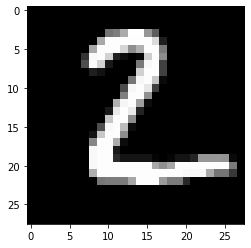

In [10]:
plt.imshow(X_test[1].reshape(28,28), cmap='gray')
y_predict = model.predict(X_test.reshape(X_test.shape[0],28,28,1))
print(y_predict[1])
print('Giá trị dự đoán: ', np.argmax(y_predict[1]))

In [11]:
y_predict1 = np.argmax(y_predict, axis = 1)

Giá trị dự đoán sai

In [12]:
y_false = y_predict1[y_predict1 != y_test]
y_true = y_test[y_predict1 != y_test]
X_false = X_test[y_predict1 != y_test,:,:]

Giá trị dự đoán:  5  Giá trị đúng:  6


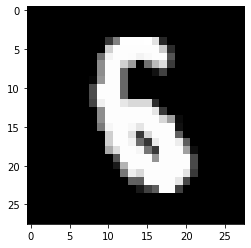

In [14]:
dem = 25
print("Giá trị dự đoán: ", y_false[dem], " Giá trị đúng: ", y_true[dem])
plt.imshow(X_false[dem].reshape(28,28), cmap='gray')
